In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pylab import rcParams
from pyvis.network import Network

print("Setup completed!")


Setup completed!


In [122]:
def user_followers_df(user_follower):
    #lettura json dell'utente desiderato
    with open(user_follower+"_followers.json", "r", encoding="UTF-8") as read_file:
        data = json.load(read_file)
    #aggiunta dei nodi
    followers_nodes=[]
    for result in data[user_follower]:
        followers_nodes.append(result)  
     #visualizzazione nodi
    df_nodes = pd.DataFrame(followers_nodes)
    display(df_nodes)
    
    #aggiunta degli archi
    followers_edges = []
    for result in data[user_follower]:
        result["target"]= user_follower
        followers_edges.append(result)
    #visualizzazione archi
    df_edges = pd.DataFrame(followers_edges)
    return df_edges

In [120]:
def follower_graph(id):
    #creazione grafo dei follower ed aggiunta dei nodi
    follower_graph = nx.DiGraph()
    for index,row in df_nodes.iterrows():
            follower_graph.add_node(row["id"],
                           id= row["id"],
                           title=[row['name']+"\n"+ row['screen_name']+"\n"+ row['location']],
                           color ="#2e00ff"
                           )            
    #aggiunta degli archi al grafo dei follower
    for index,row in df.iterrows():
        follower_graph.add_edge(row["id"],row['target'])

In [ ]:
def following_graph(id):
    #creazione grafo dei follower ed aggiunta dei nodi
    follower_graph = nx.DiGraph()
    for index,row in df_nodes.iterrows():
            follower_graph.add_node(row["id"],
                           id= row["id"],
                           title=[row['name']+"\n"+ row['screen_name']+"\n"+ row['location']],
                           color ="#ff0000"
                           )            
    #aggiunta degli archi al grafo dei follower
    for index,row in df.iterrows():
        follower_graph.add_edge(row["id"],row['target'])

In [ ]:
def disegna_grafo(grafo):
    nt = Network(
        height ="100%",
        width = "100%",
        bgcolor="#222222",
        font_color="white",
        heading= grafo,
        directed=True
    )
    nt.barnes_hut()
    nt.from_nx(grafo)
    
    neighbor_map = nt.get_adj_list()
    for node in nt.nodes:
        node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
        node["value"] = len(neighbor_map[node["id"]])
    
    nt.show("grafo.html")

In [103]:
def user_following_df(user_following):
    with open(user_following+".json", "r", encoding="UTF-8") as read_file:
        data = json.load(read_file)
    #print(data)
    following=[]
    for result in data[user_following]:
        result["source"]= user_following
        result["target"]= result["id"]
        result["name"]= result["name"]
        result["screen_name"]= result["screen_name"]
        result["location"]= result["location"]
        following.append(result) 

    df_following = pd.DataFrame(following)
    return df_following

In [ ]:
def dataframe_user(df_follower,df_following):
   df_user = pd.concat[df_follower,df_following]
    return df_user

In [37]:

#prova2[2190533245]


156

In [49]:
graph = nx.Graph()
graph2=nx.petersen_graph()

#print(graph2.nodes())
#print(graph2.edges())
 
nodes_df= pd.read_csv('asoiaf-all-nodes.csv')
edges_df = pd.read_csv('asoiaf-all-edges.csv')
display(edges_df)
#print(nodes_df.values[1])
#print("Ciao")
#nodes_df.iloc[1]
    
game_of_graphs = nx.Graph()
for index,row in nodes_df.iterrows():
    game_of_graphs.add_node(row["Id"],label = row['Label'])

for index,row in edges_df.iterrows():
    game_of_graphs.add_edge(row["Source"],row['Target'],weight= row['weight'], id=row["id"])

    
nx.write_gpickle(game_of_graphs, "data/game_of_graphs.pkl")  
game_of_graphs1 = nx.read_gpickle("data/game_of_graphs.pkl")


,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
...,...,...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,Undirected,2818,4
2819,Waymar-Royce,Will-(prologue),Undirected,2819,18
2820,Weasel,Weese,Undirected,2820,6
2821,Woth,Yoren,Undirected,2821,4


In [95]:
print(game_of_graphs1.number_of_edges())
print(game_of_graphs1.number_of_nodes())
print(game_of_graphs1.adj["Robb-Stark"])

2823
796
{'Aegon-Frey-(son-of-Stevron)': {'weight': 5, 'id': 13}, 'Arya-Stark': {'weight': 44, 'id': 348}, 'Balon-Greyjoy': {'weight': 11, 'id': 441}, 'Benjen-Stark': {'weight': 7, 'id': 559}, 'Bran-Stark': {'weight': 169, 'id': 665}, 'Brandon-Stark': {'weight': 3, 'id': 686}, 'Brienne-of-Tarth': {'weight': 5, 'id': 720}, 'Brynden-Tully': {'weight': 27, 'id': 779}, 'Catelyn-Stark': {'weight': 128, 'id': 842}, 'Cersei-Lannister': {'weight': 15, 'id': 932}, 'Cleos-Frey': {'weight': 11, 'id': 986}, 'Dacey-Mormont': {'weight': 3, 'id': 1076}, 'Davos-Seaworth': {'weight': 3, 'id': 1183}, 'Desmond-Grell': {'weight': 4, 'id': 1201}, 'Eddard-Stark': {'weight': 46, 'id': 1333}, 'Edmure-Tully': {'weight': 51, 'id': 1380}, 'Elmar-Frey': {'weight': 9, 'id': 1411}, 'Galbart-Glover': {'weight': 5, 'id': 1459}, 'Gregor-Clegane': {'weight': 4, 'id': 1556}, 'Hallis-Mollen': {'weight': 13, 'id': 1635}, 'Hodor': {'weight': 5, 'id': 1717}, 'Hoster-Tully': {'weight': 4, 'id': 1732}, 'Hullen': {'weight': 3,

In [34]:
nodes_df= pd.read_csv('asoiaf-all-nodes.csv')
edges_df = pd.read_csv('asoiaf-all-edges.csv')
game_of_graphs_2 = nx.Graph()
for index,row in nodes_df.iterrows():
    a=row["Label"].split(" ")
    if(a[len(a)-1] == "Lannister"):
        game_of_graphs_2.add_node(row["Id"],label = row['Label'])


for index,row in edges_df.iterrows():
    a=row["Source"].split("-")
    b=row["Target"].split("-")
    if((a[len(a)-1] == "Lannister") & (b[len(b)-1] == "Lannister")):
        game_of_graphs_2.add_edge(row["Source"],row['Target'],weight= row['weight'], id=row["id"])
game_of_graphs_2.number_of_edges()
nx.write_gpickle(game_of_graphs_2, "data/game_of_graphs_lannister.pkl")


['Cersei-Lannister', 'Daven-Lannister', 'Genna-Lannister', 'Jaime-Lannister', 'Joanna-Lannister', 'Kevan-Lannister', 'Lancel-Lannister', 'Martyn-Lannister', 'Stafford-Lannister', 'Tyrion-Lannister', 'Tywin-Lannister', 'Willem-Lannister']
[('Cersei-Lannister', 'Jaime-Lannister'), ('Cersei-Lannister', 'Kevan-Lannister'), ('Cersei-Lannister', 'Lancel-Lannister'), ('Cersei-Lannister', 'Tyrion-Lannister'), ('Cersei-Lannister', 'Tywin-Lannister'), ('Daven-Lannister', 'Jaime-Lannister'), ('Genna-Lannister', 'Jaime-Lannister'), ('Genna-Lannister', 'Tywin-Lannister'), ('Jaime-Lannister', 'Kevan-Lannister'), ('Jaime-Lannister', 'Lancel-Lannister'), ('Jaime-Lannister', 'Stafford-Lannister'), ('Jaime-Lannister', 'Tyrion-Lannister'), ('Jaime-Lannister', 'Tywin-Lannister'), ('Joanna-Lannister', 'Tywin-Lannister'), ('Kevan-Lannister', 'Lancel-Lannister'), ('Kevan-Lannister', 'Tyrion-Lannister'), ('Kevan-Lannister', 'Tywin-Lannister'), ('Kevan-Lannister', 'Willem-Lannister'), ('Lancel-Lannister', 'Tyr

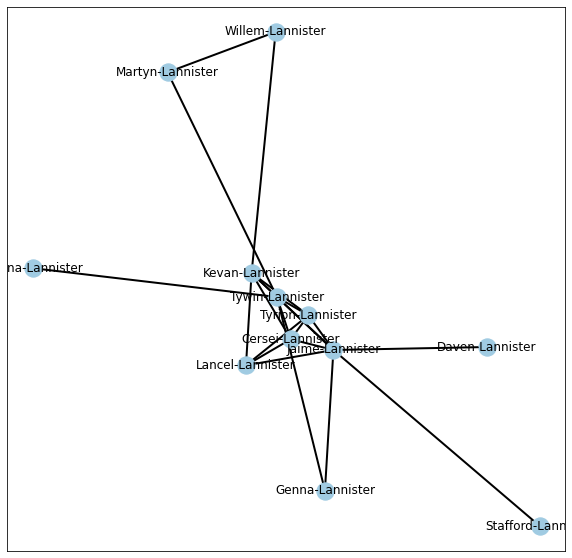

In [36]:

rcParams['figure.figsize']= 10,10
game_of_graphs = nx.read_gpickle("data/game_of_graphs_lannister.pkl")
nx.draw_networkx(
    game_of_graphs, 
    pos=nx.spring_layout(game_of_graphs),
    node_color='#A0CBE2',
    width=2,
    edge_cmap=plt.cm.Blues,
    with_labels=True
)
print(game_of_graphs.nodes())
print(game_of_graphs.edges())

plt.savefig("data/game_of_graphs.pdf")
plt.show()
plt.close()





In [4]:
from pyvis.network import Network
game_of_graphs = nx.read_gpickle("data/game_of_graphs_lannister.pkl")
nt = Network(
    height ="100%",
    width = "100%",
    bgcolor="#222222",
    font_color="white",
    heading="Game of Graphs"
)
nt.barnes_hut()
nt.from_nx(game_of_graphs)
neighbor_map = nt.get_adj_list()
for node in nt.nodes:
    node["value"] = len(neighbor_map[node["id"]])
nt.show("game_of_graphs.html")